In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the datsets
df_train= pd.read_excel("Flight_data_train.xlsx", parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
df_test=pd.read_excel("Flight_data_test.xlsx", parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
df_train["dataset"]="train"
df_test["dataset"]="test"

In [3]:
#Merging the datasets
df_flight= pd.concat([df_train, df_test],ignore_index=True)
df_flight

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset
0,No info,IndiGo,2022-03-22 01:10:00,2019-03-24,2022-09-23 22:20:00,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,train
1,No info,Air India,2022-09-23 13:15:00,2019-01-05,2022-09-23 05:50:00,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train
2,No info,Jet Airways,2022-06-10 04:25:00,2019-09-06,2022-09-23 09:25:00,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train
3,No info,IndiGo,2022-09-23 23:30:00,2019-12-05,2022-09-23 18:05:00,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train
4,No info,IndiGo,2022-09-23 21:35:00,2019-01-03,2022-09-23 16:50:00,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,2022-06-07 20:25:00,2019-06-06,2022-09-23 20:30:00,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,1 stop,test
13350,No info,IndiGo,2022-09-23 16:55:00,2019-03-27,2022-09-23 14:20:00,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,non-stop,test
13351,No info,Jet Airways,2022-03-07 04:25:00,2019-06-03,2022-09-23 21:50:00,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,1 stop,test
13352,No info,Air India,2022-09-23 19:15:00,2019-06-03,2022-09-23 04:00:00,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,1 stop,test


In [4]:
# Checking the null values in the dataset
df_flight.isnull().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Total_Stops           1
dataset               0
dtype: int64

There are no null values in any column except 'Price' which has 2671 null values but these are part of test dataset so no need to remove these null values.

In [5]:
# Checking the datatypes of the columns
df_flight.dtypes

Additional_Info            object
Airline                    object
Arrival_Time       datetime64[ns]
Date_of_Journey    datetime64[ns]
Dep_Time           datetime64[ns]
Destination                object
Duration                   object
Price                     float64
Route                      object
Source                     object
Total_Stops                object
dataset                    object
dtype: object

Column "Duration" is of object datatype which we will convert into hours as float dataype

In [7]:
# Converting datatype of duration into hours (float type)
x = (df_flight["Arrival_Time"]-df_flight["Dep_Time"])
x.head(10)

0   -186 days +02:50:00
1       0 days 07:25:00
2   -106 days +19:00:00
3       0 days 05:25:00
4       0 days 04:45:00
5       0 days 02:25:00
6   -195 days +15:30:00
7   -206 days +21:05:00
8   -194 days +01:30:00
9       0 days 07:50:00
dtype: timedelta64[ns]

In [9]:
duration_list= []
for i in range(len(x)):
    dur = x.iloc[i].seconds/3600
    duration_list.append(dur)
df_flight["Duration"] = duration_list

In [10]:
# Checking the dataframe
df_flight

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset
0,No info,IndiGo,2022-03-22 01:10:00,2019-03-24,2022-09-23 22:20:00,New Delhi,2.833333,3897.0,BLR → DEL,Banglore,non-stop,train
1,No info,Air India,2022-09-23 13:15:00,2019-01-05,2022-09-23 05:50:00,Banglore,7.416667,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train
2,No info,Jet Airways,2022-06-10 04:25:00,2019-09-06,2022-09-23 09:25:00,Cochin,19.000000,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train
3,No info,IndiGo,2022-09-23 23:30:00,2019-12-05,2022-09-23 18:05:00,Banglore,5.416667,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train
4,No info,IndiGo,2022-09-23 21:35:00,2019-01-03,2022-09-23 16:50:00,New Delhi,4.750000,13302.0,BLR → NAG → DEL,Banglore,1 stop,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,2022-06-07 20:25:00,2019-06-06,2022-09-23 20:30:00,Banglore,23.916667,NaN,CCU → DEL → BLR,Kolkata,1 stop,test
13350,No info,IndiGo,2022-09-23 16:55:00,2019-03-27,2022-09-23 14:20:00,Banglore,2.583333,NaN,CCU → BLR,Kolkata,non-stop,test
13351,No info,Jet Airways,2022-03-07 04:25:00,2019-06-03,2022-09-23 21:50:00,Cochin,6.583333,NaN,DEL → BOM → COK,Delhi,1 stop,test
13352,No info,Air India,2022-09-23 19:15:00,2019-06-03,2022-09-23 04:00:00,Cochin,15.250000,NaN,DEL → BOM → COK,Delhi,1 stop,test


'Duration' column is now converted into hours.

In [11]:
# Again checking the datatype of columns
df_flight.dtypes

Additional_Info            object
Airline                    object
Arrival_Time       datetime64[ns]
Date_of_Journey    datetime64[ns]
Dep_Time           datetime64[ns]
Destination                object
Duration                  float64
Price                     float64
Route                      object
Source                     object
Total_Stops                object
dataset                    object
dtype: object

Now, since we have Date_of_Journey, Dep_Time and Duration needed for the analysis, we can drop "Arrival_Time" column.

In [13]:
df_flight.drop(columns=["Arrival_Time"],inplace=True)

In [14]:
# Checking the counts of values in each column of object datatype
for col in df_flight.columns:
    if df_flight[col].dtype=="object":
        print(df_flight[col].value_counts())
        print()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

Cochin       5682
Banglore     3581
Delhi        1

By checking value counts, we can conclude "1 Long layover" and "2 Long layover" as "Long layover"

"No info" and "No Info" are one and the same thing, so will be replaced by "No Info"

In [17]:
# For 'Airline', we can combine a few of them to their main tag as they are vey less in counts
df_flight["Additional_Info"].replace("1 Long layover","Long layover", inplace=True)
df_flight["Additional_Info"].replace("2 Long layover","Long layover", inplace=True)
df_flight["Additional_Info"].replace("No info","No Info", inplace=True)
df_flight["Airline"].replace("Jet Airways Business","Jet Airways", inplace=True)
df_flight["Airline"].replace("Multiple carriers Premium economy","Multiple carriers", inplace=True)
df_flight["Airline"].replace("Vistara Premium economy","Vistara", inplace=True)

In [18]:
# In Destination column, "New Delhi" can be replaced by "Delhi" as 'Route' and 'Source' mention only Delhi not New Delhi
df_flight["Destination"].replace("New Delhi","Delhi", inplace=True)

In [19]:
# Again checking the value counts
for col in df_flight.columns:
    if df_flight[col].dtype=="object":
        print(df_flight[col].value_counts())
        print()

No Info                         10496
In-flight meal not included      2426
No check-in baggage included      396
Long layover                       21
Change airports                     8
Business class                      5
1 Short layover                     1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

Jet Airways          4754
IndiGo               2564
Air India            2192
Multiple carriers    1559
SpiceJet             1026
Vistara               613
Air Asia              405
GoAir                 240
Trujet                  1
Name: Airline, dtype: int64

Cochin       5682
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → JLR → HYD                   1
BOM → NDC → HYD      

In [20]:
# 'Dep_time column is of datetime datatype, so we need to extract features from dep_time such as 'time of the day' if it is morning, afternoon, night or evening flight.
df_flight["time_of_day"]=np.where((df_flight["Dep_Time"].dt.hour>=0)&(df_flight["Dep_Time"].dt.hour<=2),"Late Night",np.where((df_flight["Dep_Time"].dt.hour>=3)&(df_flight["Dep_Time"].dt.hour<=7),"Early Morning",np.where((df_flight["Dep_Time"].dt.hour>=8)&(df_flight["Dep_Time"].dt.hour<=11),"Morning",np.where((df_flight["Dep_Time"].dt.hour>=12)&(df_flight["Dep_Time"].dt.hour<=16),"Afternoon",np.where((df_flight["Dep_Time"].dt.hour>=17)&(df_flight["Dep_Time"].dt.hour<=19),"Evening","Night")))))

In [21]:
# Again checking the data
df_flight

,Additional_Info,Airline,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,dataset,time_of_day
0,No Info,IndiGo,2019-03-24,2022-09-23 22:20:00,Delhi,2.833333,3897.0,BLR → DEL,Banglore,non-stop,train,Night
1,No Info,Air India,2019-01-05,2022-09-23 05:50:00,Banglore,7.416667,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,train,Early Morning
2,No Info,Jet Airways,2019-09-06,2022-09-23 09:25:00,Cochin,19.000000,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,train,Morning
3,No Info,IndiGo,2019-12-05,2022-09-23 18:05:00,Banglore,5.416667,6218.0,CCU → NAG → BLR,Kolkata,1 stop,train,Evening
4,No Info,IndiGo,2019-01-03,2022-09-23 16:50:00,Delhi,4.750000,13302.0,BLR → NAG → DEL,Banglore,1 stop,train,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,No Info,Air India,2019-06-06,2022-09-23 20:30:00,Banglore,23.916667,NaN,CCU → DEL → BLR,Kolkata,1 stop,test,Night
13350,No Info,IndiGo,2019-03-27,2022-09-23 14:20:00,Banglore,2.583333,NaN,CCU → BLR,Kolkata,non-stop,test,Afternoon
13351,No Info,Jet Airways,2019-06-03,2022-09-23 21:50:00,Cochin,6.583333,NaN,DEL → BOM → COK,Delhi,1 stop,test,Night
13352,No Info,Air India,2019-06-03,2022-09-23 04:00:00,Cochin,15.250000,NaN,DEL → BOM → COK,Delhi,1 stop,test,Early Morning


In [22]:
# Some of the columns can be dropped like "Date_of_Journey","Route" for better analysis
df_flight.drop(columns=["Date_of_Journey","Route"], inplace=True)

### Data visualization

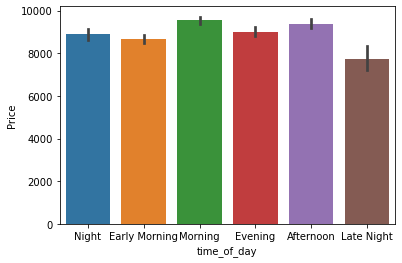

In [23]:
# Checing for distribution of price of the flights during entire day
sns.barplot(x="time_of_day",y="Price",data=df_flight)
plt.show()

Most of the flight prices are above 8000 rs except for late night, it is approx 7500 rs.

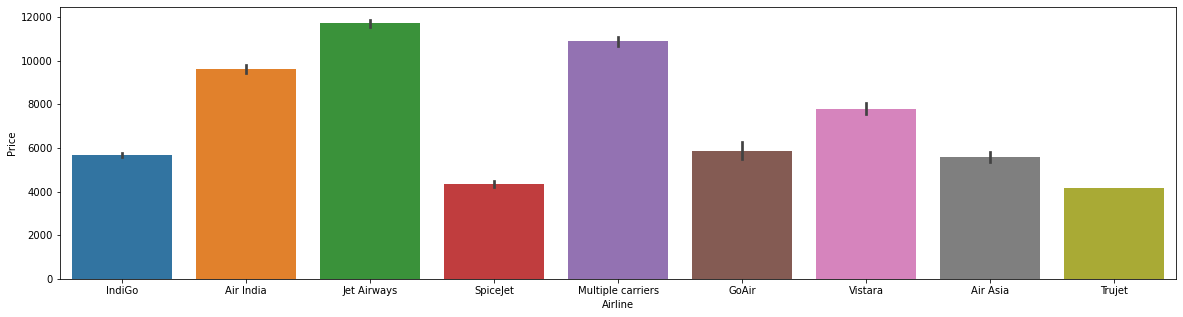

In [24]:
# Checking on expensive airlines based on average price
plt.figure(figsize=(20,5))
sns.barplot(x="Airline",y="Price",data=df_flight)
plt.show()

Among all the airlines, Jet Airways is the most expensive.

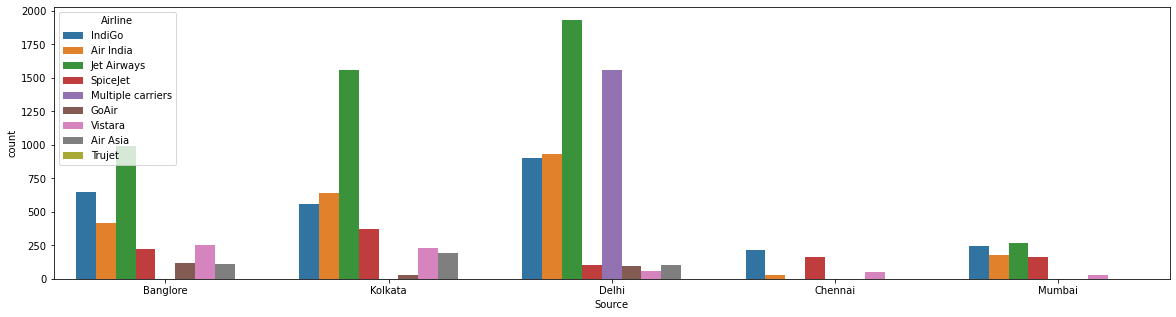

In [25]:
# Checking the most popular flight source-wise
plt.figure(figsize=(20,5))
sns.countplot(x="Source",hue="Airline",data=df_flight)
plt.show()

As we can see here, Jet Airways is the most popular flight inspite of its high price in Bangalore, Kolkata and Delhi region. It can be due to the services it provides better than other airlines or some other reasons.

As for Chennai and Mumbai, Indigo is more popular than other airlines.

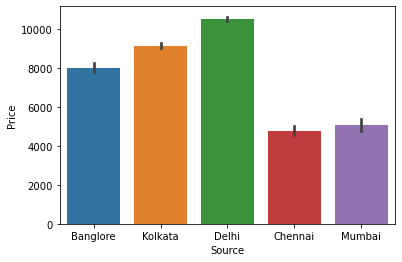

In [26]:
# Checking for average price of flights region-wise 
sns.barplot(x="Source",y="Price",data=df_flight)
plt.show()

Delhi has the highest flight price compared to other regions.

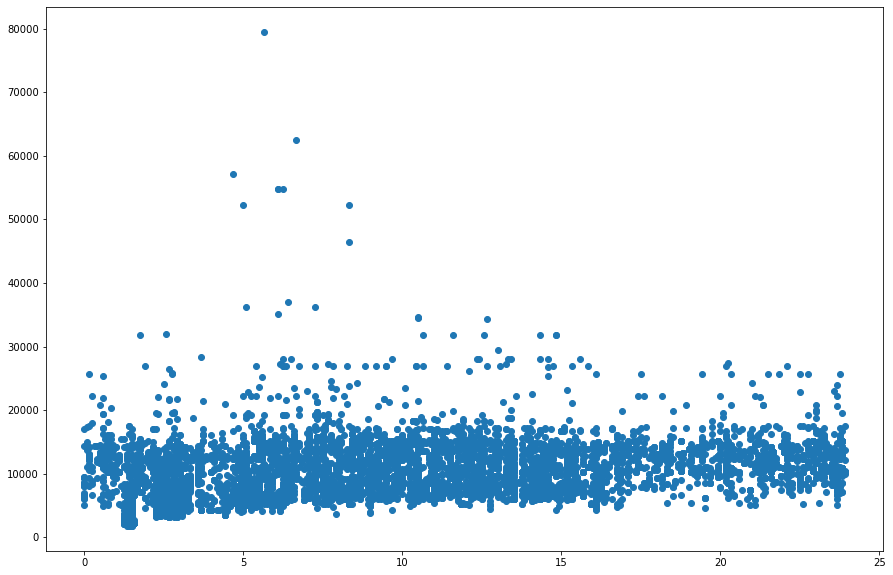

In [30]:
# Checking for relationship between Duration and Price
plt.figure(figsize=(15,10))
plt.scatter(x="Duration",y="Price",data=df_flight)
plt.show()

This does not give any clear idea about the correlation between duration and price.

In [31]:
# Checking the correlation matrix
df_flight.corr()

,Duration,Price
Duration,1.000000,0.450205
Price,0.450205,1.000000


There is a positive correlation of 0.45 between price and duration.

In [32]:
# Now deleting the Dep_Time column from the dataset
df_flight.drop(columns=["Dep_Time"],inplace=True)

In [33]:
df_flight.dtypes

Additional_Info     object
Airline             object
Destination         object
Duration           float64
Price              float64
Source              object
Total_Stops         object
dataset             object
time_of_day         object
dtype: object

In [34]:
# Using one hot encodig to covert object datatypes to integers
df_final=pd.get_dummies(df_flight,columns=["Additional_Info","Airline","Destination","Source","Total_Stops","time_of_day"],drop_first=True)

In [35]:
# Displaying the data generated after encoding
df_final

,Duration,Price,dataset,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,...,Source_Mumbai,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,time_of_day_Early Morning,time_of_day_Evening,time_of_day_Late Night,time_of_day_Morning,time_of_day_Night
0,2.833333,3897.0,train,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,7.416667,7662.0,train,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,19.000000,13882.0,train,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,5.416667,6218.0,train,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4.750000,13302.0,train,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,23.916667,NaN,test,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
13350,2.583333,NaN,test,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
13351,6.583333,NaN,test,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
13352,15.250000,NaN,test,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
# Separating the train and test data from df_final
df_train=df_final.loc[df_final["dataset"]=="train"]
df_test=df_final.loc[df_final["dataset"]=="test"]

In [37]:
# Re-indexing the test dataset
df_test.reset_index(drop=True,inplace=True)

In [38]:
# Dropping "Price" and "dataset" columns from the test dataset
# Also dropping "dataset" columns from the train dataset
df_test.drop(columns=["Price","dataset"],inplace=True)
df_train.drop(columns=["dataset"],inplace=True)

In [39]:
# Dividing the df_train into input and output
df_x=df_train.drop(columns=["Price"])
y=df_train[["Price"]]

In [40]:
# Bringing every column to a common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)

In [41]:
# Using PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=29)
x_pca=pca.fit_transform(x)
print("variance :{}".format(np.sum(pca.explained_variance_ratio_)))

variance :1.0


In [42]:
# Finding random state which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [43]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [44]:
# Using Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x_pca,y)

r2 score corresponding to  42  is  0.6363845652999374
r2 score corresponding to  43  is  0.6522398172059355
r2 score corresponding to  44  is  0.6285580162972345
r2 score corresponding to  45  is  0.6536661643093566
r2 score corresponding to  46  is  0.6497210282753836
r2 score corresponding to  47  is  0.6725164009153324
r2 score corresponding to  48  is  0.6875639574378765
r2 score corresponding to  49  is  0.658326428078754
r2 score corresponding to  50  is  0.6439122103115362
r2 score corresponding to  51  is  0.6973178741716634
r2 score corresponding to  52  is  0.6490819350401889
r2 score corresponding to  53  is  0.5860345843231656
r2 score corresponding to  54  is  0.56147209770455
r2 score corresponding to  55  is  0.6266631241491232
r2 score corresponding to  56  is  0.6275289621803669
r2 score corresponding to  57  is  0.6271515818944873
r2 score corresponding to  58  is  0.6096749576370544
r2 score corresponding to  59  is  0.6534832777658341
r2 score corresponding to  60  

In [45]:
#Checking the cross_val_score for decision tree
print("Decision Tree Regressor\n\n")
model_evaluation(dtr,x_pca,y)

Decision Tree Regressor


Mean r2 score for regressor:  0.6460765375054439
standard deviation in r2 score for regressor:  0.036575276179289205
[0.65880536 0.63959734 0.57832231 0.67566527 0.67799241]


In [46]:
# Using Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'n_estimators': 100}

In [47]:
# Checking Random forest using n_estimators=100 
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
# Checking the cross_val_score for Random Forest Regressor
print("Random Forest Regressor\n\n")
model_evaluation(rfr,x_pca,y)

Random Forest Regressor


Mean r2 score for regressor:  0.7110087585563698
standard deviation in r2 score for regressor:  0.010731860073165338
[0.69704084 0.70023987 0.71447309 0.71800273 0.72528725]


In [48]:
# Now checking KNN regressor model
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x_pca, y)
clf.best_params_

{'n_neighbors': 4}

In [49]:
knr=KNeighborsRegressor(n_neighbors=4)
maxr2_score(knr,x_pca,y)

r2 score corresponding to  42  is  0.7208443896572524
r2 score corresponding to  43  is  0.7152223834782889
r2 score corresponding to  44  is  0.7178676752085897
r2 score corresponding to  45  is  0.6901225164171904
r2 score corresponding to  46  is  0.7123808826875118
r2 score corresponding to  47  is  0.7187140714130698
r2 score corresponding to  48  is  0.6952768292513757
r2 score corresponding to  49  is  0.6851677416661162
r2 score corresponding to  50  is  0.6802034405389983
r2 score corresponding to  51  is  0.7378473171665663
r2 score corresponding to  52  is  0.7138087628392363
r2 score corresponding to  53  is  0.6576854747174481
r2 score corresponding to  54  is  0.6937986875709645
r2 score corresponding to  55  is  0.6716415605461961
r2 score corresponding to  56  is  0.6732614569359558
r2 score corresponding to  57  is  0.6895500494864681
r2 score corresponding to  58  is  0.6948771063426911
r2 score corresponding to  59  is  0.698423282717185
r2 score corresponding to  60

77

In [50]:
# Checking the cross_val score of KKN regressor
print("KNN Regressor\n\n")
model_evaluation(knr,x_pca,y)

KNN Regressor


Mean r2 score for regressor:  0.7087940147730911
standard deviation in r2 score for regressor:  0.009440228531700123
[0.6975208  0.71026278 0.6986617  0.72149604 0.71602877]


In [51]:
# Checking the SVM
from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [52]:
svr=SVR(C=10,kernel="linear")
maxr2_score(svr,x_pca,y)

r2 score corresponding to  42  is  0.601477763497601
r2 score corresponding to  43  is  0.6249850119425433
r2 score corresponding to  44  is  0.6171572826999622
r2 score corresponding to  45  is  0.5814434685219423
r2 score corresponding to  46  is  0.610448963172604
r2 score corresponding to  47  is  0.5958986138176054
r2 score corresponding to  48  is  0.5837120825589899
r2 score corresponding to  49  is  0.6154336756496523
r2 score corresponding to  50  is  0.5890415835464372
r2 score corresponding to  51  is  0.6387123768969998
r2 score corresponding to  52  is  0.5963139280738678
r2 score corresponding to  53  is  0.6177152412731075
r2 score corresponding to  54  is  0.6110495998340839
r2 score corresponding to  55  is  0.5514515698665128
r2 score corresponding to  56  is  0.5769208018784349
r2 score corresponding to  57  is  0.6098311255012492
r2 score corresponding to  58  is  0.6497953953317793
r2 score corresponding to  59  is  0.590443001496519
r2 score corresponding to  60  

75

In [53]:
#Checking the cross_val_score for decision tree
print("Support Vector Regressor\n\n")
model_evaluation(svr,x_pca,y)

Support Vector Regressor


Mean r2 score for regressor:  0.6130632725934557
standard deviation in r2 score for regressor:  0.026160107199898846
[0.56995491 0.64922356 0.6173976  0.60356144 0.62517886]


Random forest regressor and KNN are peforming almost equally good, but KNN is faster so we will choose KNN as our Final model

In [56]:
#Using KNN as final model
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 77,test_size=0.20)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)

In [56]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  2136.4461637027257
r2_score is:  0.7620925165153518


In [57]:
# Transforming df_test according to pca
x_pca_test=pca.transform(df_test)

In [58]:
price_pred=knr.predict(x_pca_test)

In [59]:
# Creating the dataframe for price_pred
price_pred=pd.DataFrame(price_pred,columns=["Price"])

In [60]:
price_pred.head()

,Price
0,15134.0
1,13888.5
2,15134.0
3,11246.5
4,19537.0


In [61]:
# Saving the submission to csv
price_pred.to_csv("Flight_Price_Predictions.csv",index=False)